# Seminário - Algoritmos genéticos

### Estrutura de um algoritmos genéticos
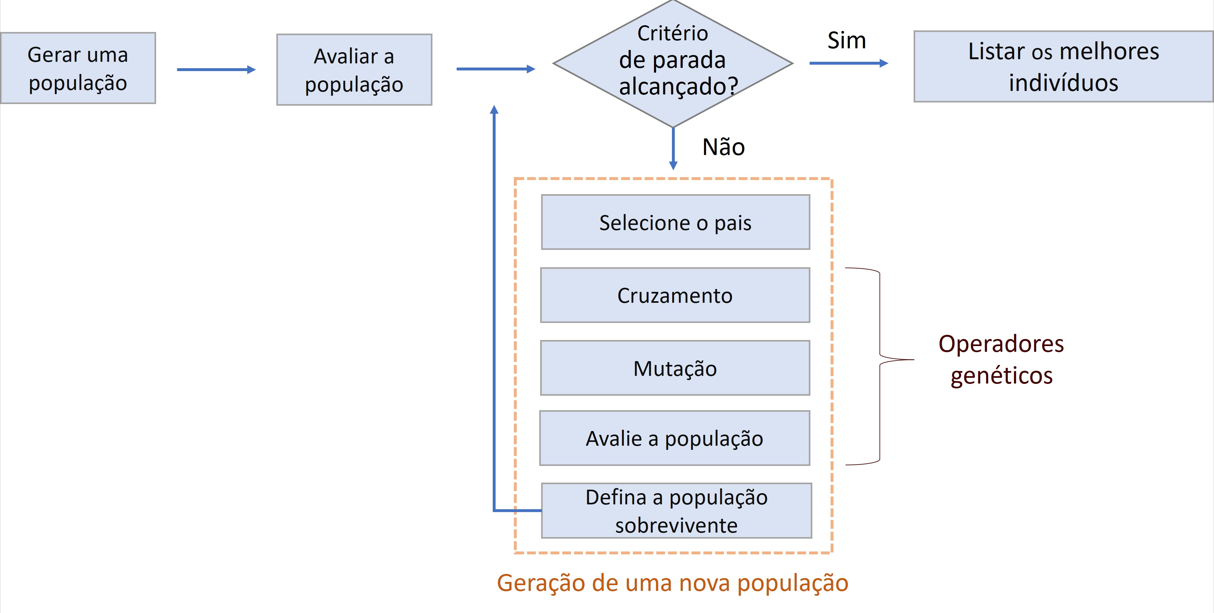

# Problema da mochila

> O problema da mochila é um problema de otimização combinatória. Podemos entendê-lo como o desafio de encher uma mochila sem ultrapassar um determinado limite de peso, otimizando o valor do produto carregado.

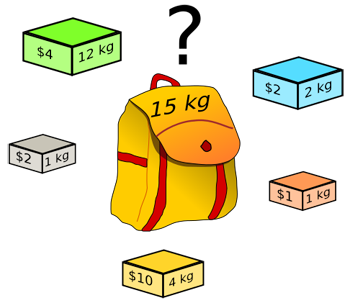

### Dados utilizados:

In [1]:
# Dados
itens <- c(
  "Capa de chuva",
  "Canivete",
  "Água mineral",
  "Luvas",
  "Saco de dormir",
  "Tenda",
  "Fogão portátil",
  "Comida enlatada",
  "Laches"
)

pesos <- c(2, 1, 6, 1, 4, 9, 5, 8, 3)
pontos_sobrevivencia <- c(5, 3, 15, 5, 6, 18, 8, 20, 8)

dados <- data.frame(itens, pesos, pontos_sobrevivencia)
colnames(dados) <- c('Itens', 'Pesos (Kg)', 'Pontos sobrevivência')

dados

Itens,Pesos (Kg),Pontos sobrevivência
<chr>,<dbl>,<dbl>
Capa de chuva,2,5
Canivete,1,3
Água mineral,6,15
Luvas,1,5
Saco de dormir,4,6
Tenda,9,18
Fogão portátil,5,8
Comida enlatada,8,20
Laches,3,8


In [2]:
# Definindo uma semente
set.seed(17)

In [3]:
# Criando as classes
setClass(
  "Solucao",
  slots = c(
    pesos = "numeric",
    pontos_sobrevivencia = "numeric",
    limite_peso = "numeric",
    nota_avaliacao = "numeric",
    peso_total = "numeric",
    geracao = "numeric",
    cromossomo = "character"
  ),
  prototype = list(
    pesos = 0,
    pontos_sobrevivencia = 0,
    limite_peso = 0,
    nota_avaliacao = 0,
    geracao = 0
  )
)

setClass(
    "algoritmoGenetico",
    slots = c( # Atributos da classe
        tamanho_populacao = "numeric",
        populacao = "list",
        geracao = "numeric",
        melhor_solucao = "Solucao",
        lista_solucoes = "list"
    )
)

## Funções

In [4]:
gerar_cromossomo <- function(tamanho_cromossomo) {
    cromossomo <- sample(
        x = c("0", "1"), 
        size = tamanho_cromossomo, 
        replace = T
    ) 
    
    return(cromossomo)
}

In [5]:
inicializa_populacao <- function(algoritmo_genetico, pesos, pontos_sobrevivencia, limite) {
    for (i in 1:algoritmo_genetico@tamanho_populacao) {
        algoritmo_genetico@populacao[[i]] <- 
        new(
            "Solucao", 
            pesos = pesos,
            pontos_sobrevivencia = pontos_sobrevivencia,
            limite_peso = limite
        )
        
        algoritmo_genetico@populacao[[i]]@cromossomo <- gerar_cromossomo(length(pesos))
        
    }
    
    return(algoritmo_genetico)
}

In [6]:
avaliacao <- function(solucao) {
    nota <- 0
    soma_pesos <- 0
    for (i in 1:length(solucao@cromossomo)) {
        if (solucao@cromossomo[i] == '1') {
            nota <- nota + solucao@pontos_sobrevivencia[i]
            soma_pesos <- soma_pesos + solucao@pesos[i]
        }
    }
    
    if (soma_pesos > solucao@limite_peso) {
        nota = 1
    }
    
    solucao@nota_avaliacao <- nota
    solucao@peso_total <- soma_pesos
    
    return(solucao)
}

In [7]:
crossover <- function(solucao_a, solucao_b) {
    indices <- 1:length(solucao_a@cromossomo)
    corte <- sample(indices, 1)
    
    # cat("\nPonto de corte:", corte)
    
    if (corte == length(solucao_a@cromossomo)) {
        filho1 <- solucao_b@cromossomo[1:corte]
        filho2 <- solucao_a@cromossomo[1:corte]
    } else {
        filho1 <- c(solucao_b@cromossomo[1:corte], solucao_a@cromossomo[(corte+1):length(solucao_a@cromossomo)])
        filho2 <- c(solucao_a@cromossomo[1:corte], solucao_b@cromossomo[(corte+1):length(solucao_b@cromossomo)])
    }
    
    filhos <- list( # Construtor
        new(
            "Solucao", 
            pesos = solucao_a@pesos,
            pontos_sobrevivencia = solucao_a@pontos_sobrevivencia,
            limite_peso = solucao_a@limite_peso,
            geracao = solucao_a@geracao + 1,
            cromossomo = filho1
        ),
        new(
            "Solucao", 
            pesos = solucao_b@pesos,
            pontos_sobrevivencia = solucao_b@pontos_sobrevivencia,
            limite_peso = solucao_b@limite_peso,
            geracao = solucao_b@geracao + 1,
            cromossomo = filho2
        )
    )
    
  return(filhos)
    
}

In [8]:
mutacao <- function(solucao, taxa_mutacao) {
    for (i in 1:length(solucao@cromossomo)) {
        if (runif(n = 1, min = 0, max = 1) < taxa_mutacao) {
            if (solucao@cromossomo[i] == '1') {
                solucao@cromossomo[i] <- '0'
            } else {
                solucao@cromossomo[i] <- '1'
            }
        }
    }
    
    return(solucao)
}

In [9]:
ordena_populacao <- function(populacao) {
    populacao_ordenada <- c()
    notas_avaliacao <- c()
    for (solucao in populacao) {
        notas_avaliacao <- c(notas_avaliacao, solucao@nota_avaliacao)
    }
    lista_posicao <- order(notas_avaliacao, decreasing = T)
    for (i in 1:length(lista_posicao)) {
        populacao_ordenada <- c(populacao_ordenada, populacao[[lista_posicao[i]]])
    }
    
    return(populacao_ordenada)
}

In [10]:
melhor_solucao <- function(algoritmo_genetico, solucao) {
    algoritmo_genetico@lista_solucoes <- c(
        algoritmo_genetico@lista_solucoes,
        solucao@nota_avaliacao
    )
    
    if (solucao@nota_avaliacao > algoritmo_genetico@melhor_solucao@nota_avaliacao) {
        algoritmo_genetico@melhor_solucao <- solucao
    }
    
    return(algoritmo_genetico)
}

In [11]:
soma_avaliacoes <- function(algoritmo_genetico) {
    soma <- 0
    for (solucao in algoritmo_genetico@populacao) {
        soma = soma + solucao@nota_avaliacao
    }
    
    return(soma)
}

In [12]:
selecao_roleta <- function(algoritmo_genetico, soma_avaliacoes) { # Método da roleta viciada
    pai <- 0
    valor_sorteado <- runif(1, min = 0, max = 1) * soma_avaliacoes
    soma <- 0
    i <- 1
    while (i < length(algoritmo_genetico@populacao) & soma < valor_sorteado) {
        soma <- soma + algoritmo_genetico@populacao[[i]]@nota_avaliacao
        pai <- pai + 1
        i <- i + 1
    }
    
    return(pai)
}

In [13]:
visualiza_geracao <- function(algoritmo_genetico) {
    melhor <- algoritmo_genetico@populacao[[1]]
    cat(
        "\n- Geração:", melhor@geracao, 
        "\nNota sobrevivência:", melhor@nota_avaliacao,
        "\nPeso total:", melhor@peso_total,
        "\nCromossomo:", melhor@cromossomo
        
    )
}

In [14]:
resolver <- function(algoritmo_genetico, taxa_mutacao, num_geracoes, pesos, pontos_sobrevivencia, limite_peso) {
    ag <- algoritmo_genetico
    ag <- inicializa_populacao(
        algoritmo_genetico = ag,
        pesos = pesos,
        pontos_sobrevivencia = pontos_sobrevivencia,
        limite = limite_peso
    )
    
    for (i in 1:ag@tamanho_populacao) {
        ag@populacao[[i]] <- avaliacao(ag@populacao[[i]])
    }
    
    ag@populacao <- ordena_populacao(ag@populacao)
    ag@melhor_solucao <- ag@populacao[[1]]
    visualiza_geracao(algoritmo_genetico = ag) 
    
    for (i in 1:num_geracoes) {
        
        soma = soma_avaliacoes(algoritmo_genetico = ag)
        nova_populacao <- c()
        
        for(solucoes_geradas in 1:(ag@tamanho_populacao / 2)) {
            
            pai1 <- 1
            pai2 <- 1
            
           while (pai1 == pai2) {
              pai1   <- selecao_roleta(
                algoritmo_genetico = ag, 
                soma_avaliacoes = soma
              )

              pai2 <- selecao_roleta(
                algoritmo_genetico = ag, 
                soma_avaliacoes = soma
              )
            }
            
          # Combinando os pais e criando dois filhos
          filhos = crossover(
            solucao_a = ag@populacao[[pai1]],
            solucao_b = ag@populacao[[pai2]]
          )
           
          filho1 <- mutacao(
            solucao = filhos[[1]], 
            taxa_mutacao = 0.05
          )
            
          filho2 <- mutacao(
            solucao = filhos[[2]], 
            taxa_mutacao = 0.05
          )
            
          filhos_gerados <- c(filho1, filho2)
            
          nova_populacao <- c(nova_populacao, filhos_gerados)   
        }
        
        ag@populacao <- nova_populacao
        # Realizando a avaliação da nova população
        for (i in 1:ag@tamanho_populacao) {
            ag@populacao[[i]] <- avaliacao(ag@populacao[[i]])
        }
        
        ag@populacao <- ordena_populacao(ag@populacao)
        
        visualiza_geracao(algoritmo_genetico = ag) 
        
        ag <- melhor_solucao(
            algoritmo_genetico = ag,
            solucao = ag@populacao[[1]]
        )
    }
    
    
   cat(
    "\n----------------------------------", 
    "\n**** Melhor solução ***", 
    "\nGeração:", ag@melhor_solucao@geracao,
    "\nromossomo:", ag@melhor_solucao@cromossomo,
    "\nPeso total:", ag@melhor_solucao@peso_total,
    "\nPontos de sobrevivência:", ag@melhor_solucao@nota_avaliacao
    ) 
    
    return(ag)
    
}

In [15]:
itens <- c(
    "Capa de chuva",
    "Canivete",
    "Água mineral",
    "Luvas",
    "Saco de dormir",
    "Tenda",
    "Fogão portátil",
    "Comida enlatada",
    "Laches"
)

pesos <- c(2, 1, 6, 1, 4, 9, 5, 8, 3)
pontos_sobrevivencia <- c(5, 3, 15, 5, 6, 18, 8, 20, 8)

# -----------------

limite <- 25 # Limite da mochila
tamanho <- 20 # Tamanho da população
probabilidade_mutacao <- 0.05
numero_geracoes <- 50

ag <- new(
    "algoritmoGenetico",
    tamanho_populacao = tamanho
)

ag <- resolver(
    algoritmo_genetico = ag,
    taxa_mutacao = probabilidade_mutacao, 
    num_geracoes = numero_geracoes, 
    pesos = pesos, 
    pontos_sobrevivencia = pontos_sobrevivencia, 
    limite_peso = limite
)


- Geração: 0 
Nota sobrevivência: 57 
Peso total: 25 
Cromossomo: 0 0 0 1 1 1 0 1 1
- Geração: 1 
Nota sobrevivência: 57 
Peso total: 25 
Cromossomo: 0 0 0 1 1 1 0 1 1
- Geração: 2 
Nota sobrevivência: 57 
Peso total: 25 
Cromossomo: 0 0 0 1 1 1 0 1 1
- Geração: 3 
Nota sobrevivência: 57 
Peso total: 25 
Cromossomo: 0 0 0 1 1 1 0 1 1
- Geração: 4 
Nota sobrevivência: 57 
Peso total: 25 
Cromossomo: 0 0 0 1 1 1 0 1 1
- Geração: 5 
Nota sobrevivência: 57 
Peso total: 25 
Cromossomo: 0 0 0 1 1 1 0 1 1
- Geração: 6 
Nota sobrevivência: 57 
Peso total: 25 
Cromossomo: 0 0 0 1 1 1 0 1 1
- Geração: 7 
Nota sobrevivência: 57 
Peso total: 25 
Cromossomo: 0 0 0 1 1 1 0 1 1
- Geração: 8 
Nota sobrevivência: 57 
Peso total: 25 
Cromossomo: 0 0 0 1 1 1 0 1 1
- Geração: 9 
Nota sobrevivência: 57 
Peso total: 25 
Cromossomo: 0 0 0 1 1 1 0 1 1
- Geração: 10 
Nota sobrevivência: 57 
Peso total: 25 
Cromossomo: 0 0 0 1 1 1 0 1 1
- Geração: 11 
Nota sobrevivência: 54 
Peso total: 24 
Cromossomo: 1 0 0 1

### Quais os itens que deveriam ser levados na mochila?

In [16]:
peso_total <- 0
pontos <- 0
for (i in 1:length(itens)) {
    if (ag@melhor_solucao@cromossomo[i] == '1') {
        peso_total <- peso_total + pesos[i]
        pontos <- pontos + pontos_sobrevivencia[i]
        cat(
            "\nItem:", itens[i],
            " | Peso:", pesos[i],
            " | Pontos sobrevivência:", pontos_sobrevivencia[i]
        )
    }
}

cat(
    "\n-------------------------------------------",
    "\nPeso total:", peso_total, "- Pontos", pontos
) 


Item: Água mineral  | Peso: 6  | Pontos sobrevivência: 15
Item: Luvas  | Peso: 1  | Pontos sobrevivência: 5
Item: Tenda  | Peso: 9  | Pontos sobrevivência: 18
Item: Comida enlatada  | Peso: 8  | Pontos sobrevivência: 20
------------------------------------------- 
Peso total: 24 - Pontos 58

## Gráfico - Melhores soluções de cada geração

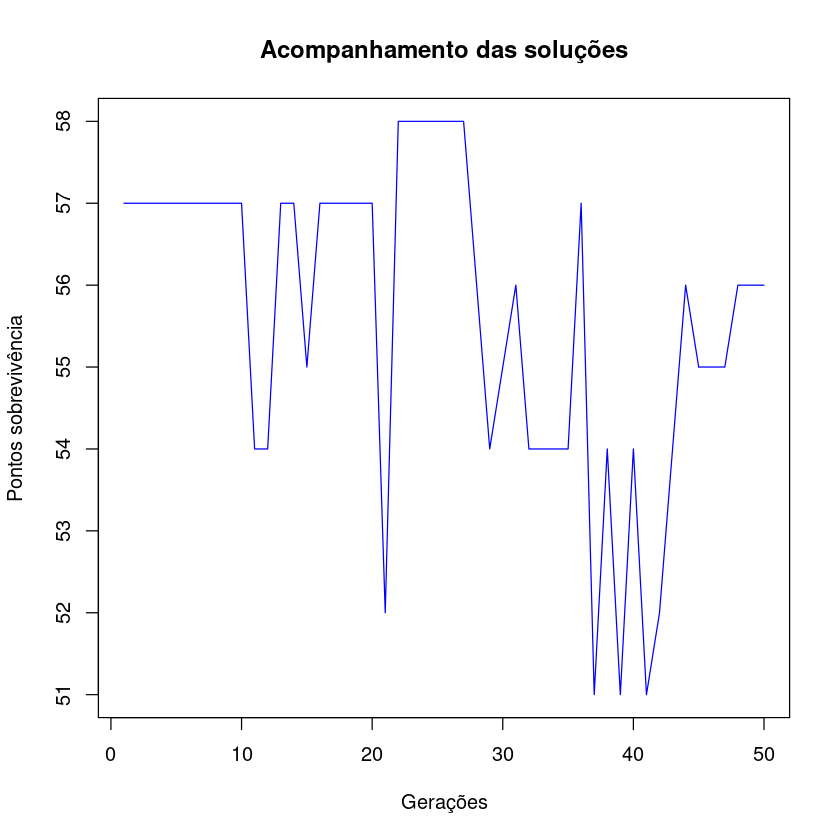

In [17]:
plot(
    x = 1:numero_geracoes,
    y = ag@lista_solucoes,
    type = "l",
    main = "Acompanhamento das soluções",
    col = "blue",
    xlab = "Gerações",
    ylab = "Pontos sobrevivência"
)

# Resolvendo o problema da mochila - Pacote GA

In [18]:
# install.packages("GA")

In [19]:
library(GA)

Carregando pacotes exigidos: foreach

Carregando pacotes exigidos: iterators

Package 'GA' version 3.2.1
Type 'citation("GA")' for citing this R package in publications.


Attaching package: ‘GA’


The following object is masked from ‘package:utils’:

    de




In [20]:
itens <- c(
    "Capa de chuva",
    "Canivete",
    "Água mineral",
    "Luvas",
    "Saco de dormir",
    "Tenda",
    "Fogão portátil",
    "Comida enlatada",
    "Laches"
)
pesos <- c(2, 1, 6, 1, 4, 9, 5, 8, 3)
pontos_sobrevivencia <- c(5, 3, 15, 5, 6, 18, 8, 20, 8)

limite <- 25

In [21]:
avaliacao <- function(cromossomo) { 
    nota <- 0
    soma_pesos <- 0
    for (i in 1:length(cromossomo)) {
        if (cromossomo[i] == '1') {
            nota <- nota + pontos_sobrevivencia[i]
            soma_pesos <- soma_pesos + pesos[i]
        }
    }
    
    if (soma_pesos > limite) {
        nota = 1
    }
    
    return(nota)
}

In [22]:
algoritmo <- ga(
    type = "binary",
    fitness = avaliacao,
    nBits = length(itens), # Quantidade de genes no cromossomo
    population = gabin_Population, # Função responsável por criar uma população inicial aleatória
    selection = gabin_rwSelection, # Método da roleta viciada
    crossover = gabin_spCrossover, # Operação com somente um ponto de corte
    mutation = gabin_raMutation, # Onde o que é zero virá um e o que for um vira zero
    popSize = 20,
    pcrossover = 0.8, # Porcentagem de casos que irá acontecer o crossover
    pmutation = 0.05,
    elitism = 0.05, # Probabilidade dos melhores individuos na próxima geração
    maxiter = 100,
    keepBest = TRUE, # Salva as melhores soluções de cada geração
    seed = 17 # Semente  
)

In [23]:
summary(algoritmo)

── Genetic Algorithm ─────────────────── 

GA settings: 
Type                  =  binary 
Population size       =  20 
Number of generations =  100 
Elitism               =  0 
Crossover probability =  0.8 
Mutation probability  =  0.05 

GA results: 
Iterations             = 100 
Fitness function value = 62 
Solution = 
     x1 x2 x3 x4 x5 x6 x7 x8 x9
[1,]  1  1  1  1  1  0  0  1  1

In [24]:
algoritmo@solution # Solução ótima

x1,x2,x3,x4,x5,x6,x7,x8,x9
1,1,1,1,1,0,0,1,1


In [25]:
algoritmo@bestSol # Melhores soluções de cada geração

0,1,1,1,1,0,0,1,1
1,1,1,1,1,0,0,1,1
1,1,1,1,1,0,0,1,1
1,1,1,0,1,0,0,1,1
1,1,1,0,1,0,0,1,1
1,1,1,1,1,0,0,1,1
1,1,1,1,1,0,0,1,1
1,1,1,1,1,0,0,1,1
1,1,1,1,1,0,0,1,1
1,1,1,1,1,0,0,1,1
1,1,1,1,1,0,0,1,1


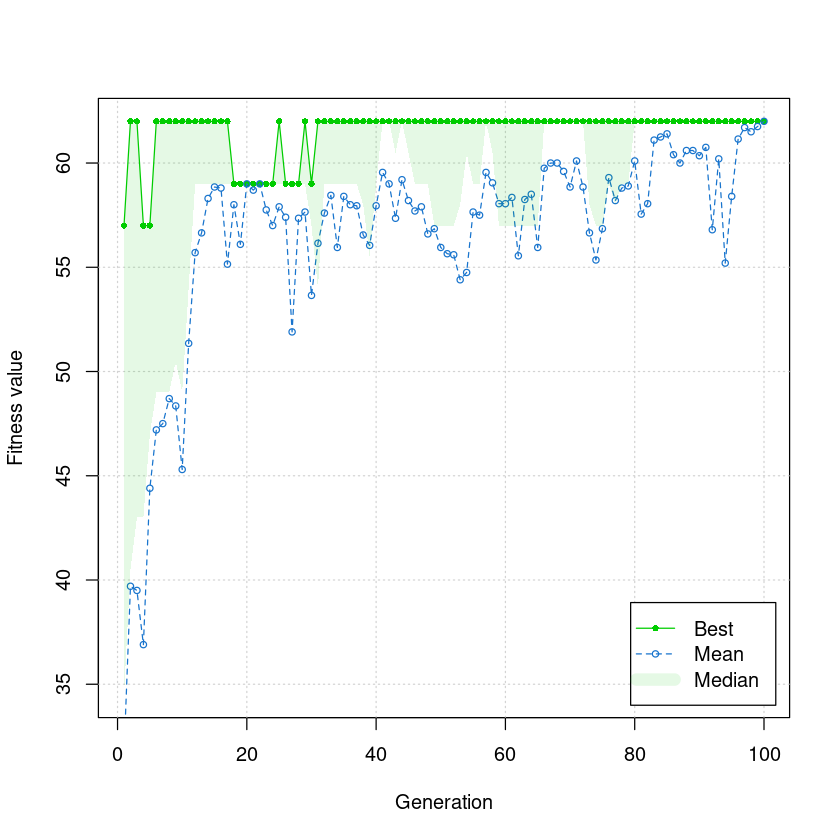

In [26]:
plot(algoritmo) # Gráfico com as melhores soluções de cada geração

### Quais os itens que deveriam ser levados na mochila?

In [27]:
peso_total <- 0
pontos <- 0
for (i in 1:length(itens)) {
    if (as.character(algoritmo@solution)[i] == '1') {
        peso_total <- peso_total + pesos[i]
        pontos <- pontos + pontos_sobrevivencia[i]
        cat(
            "\nItem:", itens[i],
            " | Peso:", pesos[i],
            " | Pontos sobrevivência:", pontos_sobrevivencia[i]
        )
    }
}

cat(
    "\n-------------------------------------------",
    "\nPeso total:", peso_total, "- Pontos", pontos
) 


Item: Capa de chuva  | Peso: 2  | Pontos sobrevivência: 5
Item: Canivete  | Peso: 1  | Pontos sobrevivência: 3
Item: Água mineral  | Peso: 6  | Pontos sobrevivência: 15
Item: Luvas  | Peso: 1  | Pontos sobrevivência: 5
Item: Saco de dormir  | Peso: 4  | Pontos sobrevivência: 6
Item: Comida enlatada  | Peso: 8  | Pontos sobrevivência: 20
Item: Laches  | Peso: 3  | Pontos sobrevivência: 8
------------------------------------------- 
Peso total: 25 - Pontos 62